<a href="https://colab.research.google.com/github/robiulislam1999/CSE718/blob/main/chap04_file02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Examples**

Sweeping Parameters

In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 5.7 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
# import functions from modsim

from modsim import *

In [4]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/chap03.py')

Downloaded chap03.py


In [5]:
from chap03 import step

Functions That Return Values

In [6]:
from numpy import sqrt

root = sqrt(4)
cardelivery = State(bmw=10, mercedes=2)
cardelivery
def add_five(x):
    return x + 2
add_five(1)

3

In [7]:
def step(state, p1, p2):
     if flip(p1):
        car_mercedes(state)

     if flip(p2):
        car_bmw(state)
def car_bmw(state):
    """Move one car from mercedes to bmw.

    state: cardelivery State object
    """
    if state.mercedes == 0:
        state.mercedes_empty += 1
        return
    state.mercedes -= 1
    state.bmw += 1
def car_mercedes(state):
    """Move one car from bmw to mercedes.

    state: cardelivery State object
    """
    state.bmw -= 1
    state.mercedes += 1
def run_simulation(p1, p2, num_steps):
    state = State(bmw=5, mercedes=4,
                  bmw_empty=3, mercedes_empty=2)

    for i in range(num_steps):
        step(state, p1, p2)

    return state

In [8]:
final_state = run_simulation(0.2, 0.3, 20)
print(final_state.bmw_empty,
      final_state.mercedes_empty)

3 2


Loops and Arrays

In [9]:
from numpy import linspace

p1_array = linspace(0, 1, 5)
p1_array
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


Sweeping Parameters

In [10]:
p1_array = linspace(0, 0.6, 6)
p2 = 0.2
num_steps = 10

for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    print(p1, final_state.bmw_empty)

0.0 3
0.12 3
0.24 3
0.36 3
0.48 3
0.6 3


In [11]:
sweep = SweepSeries()
p1_array = linspace(0, 0.6, 10)

for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    sweep[p1] = final_state.bmw_empty
show(sweep)

,Metric
Parameter,
0.000000,3
0.066667,3
0.133333,3
0.200000,3
0.266667,3
0.333333,3
0.400000,3
0.466667,3
0.533333,3


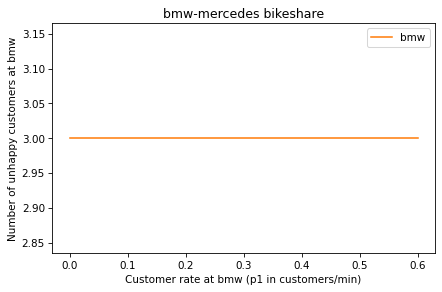

In [12]:
sweep.plot(label='bmw', color='C1')

decorate(title='bmw-mercedes bikeshare',
         xlabel='Customer rate at bmw (p1 in customers/min)',
         ylabel='Number of unhappy customers at bmw')

**Exercises**

Exercise 1

In [13]:
def make_state():
  state = State(bmw=10, mercedes=2)
inti = make_state()

Exercise 2

In [14]:
from numpy import linspace
np.linspace(2,4, num=20)

array([2.        , 2.10526316, 2.21052632, 2.31578947, 2.42105263,
       2.52631579, 2.63157895, 2.73684211, 2.84210526, 2.94736842,
       3.05263158, 3.15789474, 3.26315789, 3.36842105, 3.47368421,
       3.57894737, 3.68421053, 3.78947368, 3.89473684, 4.        ])

Exercise 3

0.0 3
0.02 3
0.04 3
0.06 3
0.08 3
0.1 3
0.12 3
0.14 3
0.16 3
0.18 3
0.2 3
0.22 3
0.24 3
0.26 3
0.28 3
0.3 3
0.32 3
0.34 3
0.36 3
0.38 3
0.4 3
0.42 3
0.44 3
0.46 3
0.48 3
0.5 3
0.52 3
0.54 3
0.56 3
0.58 3
0.6 3


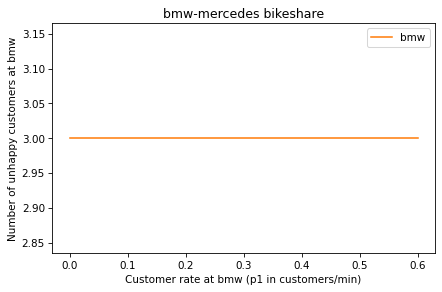

In [15]:
sweep = SweepSeries()
def sweep_p1():
  p1_array = linspace(0, 0.6, 31)
  p2 = 0.2
  num_steps = 60
  for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    sweep[p1] = final_state.bmw_empty
    print(p1, final_state.bmw_empty)
  sweep.plot(label='bmw', color='C1')
  decorate(title='bmw-mercedes bikeshare',
          xlabel='Customer rate at bmw (p1 in customers/min)',
          ylabel='Number of unhappy customers at bmw')
sweep_p1()

Exercise 4

0.0 3
0.02 3
0.04 3
0.06 3
0.08 3
0.1 3
0.12 3
0.14 3
0.16 3
0.18 3
0.2 3
0.22 3
0.24 3
0.26 3
0.28 3
0.3 3
0.32 3
0.34 3
0.36 3
0.38 3
0.4 3
0.42 3
0.44 3
0.46 3
0.48 3
0.5 3
0.52 3
0.54 3
0.56 3
0.58 3
0.6 3


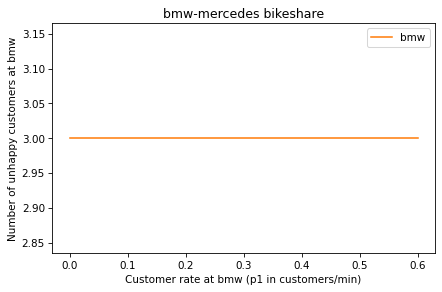

In [20]:
sweep = SweepSeries()
def sweep_p2():
  p1 = 0.5
  p2_array = linspace(0, 0.6, 31)
  num_steps = 60
  for p2 in p2_array:
    final_state = run_simulation(p1, p2, num_steps)
    sweep[p2] = final_state.bmw_empty
    print(p2, final_state.bmw_empty)
  sweep.plot(label='bmw', color='C1')
  decorate(title='bmw-mercedes bikeshare',
          xlabel='Customer rate at bmw (p1 in customers/min)',
          ylabel='Number of unhappy customers at bmw')
sweep_p2()